<a href="https://colab.research.google.com/github/QwertyJacob/colab_handouts_PSI/blob/main/4.2..4_CLT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 4.3 Distribuzioni Congiunte:
__________________
Addattamento da: 
- Probability and Statistics for Computer Scientists, M. Baron, CRC Press, 2014

Spesso dovremmo considerare diverse variabili aleatorie simultaneamente. Possiamo per esempio dover pensare alla dimensione di una RAM e la velocità di una CPU, il prezzo di un computer e la sua capacità, la temperatura e l'umidità, le prestazioni tecniche e artistiche, ecc.



### 4.3.1 Distribuzione congiunta e distribuzioni marginali

> **DEFINIZIONE 4.4**  **Distribuzione congiunta**. Se $ X $ e $ Y $ sono variabili aleatorie, allora la coppia $ (X, Y) $ è un **vettore aleatorio**. La sua distribuzione è chiamata **distribuzione congiunta** di $ X $ e $ Y $. Le distribuzioni individuali di $ X $ e $ Y $ sono quindi chiamate distribuzioni **marginali**.

Anche se in questa sezione parliamo di due variabili aleatorie, tutti i concetti si estendono a un vettore $(X_1, X_2, \ldots, X_n)$ di $ n $ componenti e alla sua distribuzione congiunta.

In modo analogo al caso di una singola variabile, la distribuzione congiunta di un vettore è una collezione di probabilità che, per esempio, due variabili aleatorie $(X, Y)$ assumano, rispettivamente, un valore $(x, y)$. Quando diciamo che $X=x$ "e" $Y=y$, questo "e" indica l'intersezione, quindi la funzione di massa di probabilità congiunta di $ X $ e $ Y $. In linguaggio matematico si scrive:
$$
P(x, y) = P((X, Y) = (x, y)) = P(X = x \cap Y = y).
$$
Ancora una volta, tutti gli eventi possibili  $ \{(X, Y) = (x, y)\} $ sono esaustivi e mutuamente esclusivi per coppie diverse $ (x, y) $, quindi
$$
\sum_x \sum_y P(x, y) = 1.
$$

La distribuzione congiunta di $ (X, Y) $ contiene informazioni complete sul comportamento di questo vettore aleatorio. In particolare, le funzioni di massa di probabilità marginali di $ X $ e $ Y $ possono essere ottenute dalla funzione di massa congiunta mediante la regola dell'addizione. (Figura 3.2)

![Figure 3.2](figs/3.2.png)


**(Regola dell'addizione)** 

$$
\boxed{
\begin{aligned}
&\textbf{Regola dell'addizione}\\
P_X(x) &= P(X = x) = \sum_y P_{(X,Y)}(x, y)\\
P_Y(y) &= P(Y = y) = \sum_x P_{(X,Y)}(x, y)\\
\end{aligned}
} \tag{4.17}
$$


Cioè, per ottenere la funzione di massa di probabilità marginale di una variabile, si sommano le probabilità congiunte su tutti i valori dell'altra variabile.

La Regola dell'addizione è illustrata nella Figura 3.2. Gli eventi $ \{Y = y\} $, per diversi valori di $ y $, partizionano lo spazio campione $ \Omega $. Di conseguenza, le loro intersezioni con $ \{X = x\} $ partizionano l'evento $ \{X = x\} $ in parti mutuamente esclusive. Applicando la regola per l'unione di eventi mutuamente esclusivi, cioè la formula $(2.4)$, le relative probabilità vanno sommate. Queste probabilità sono proprio $ P_{(X,Y)}(x, y) $.

In generale, la distribuzione congiunta non può essere calcolata a partire dalle distribuzioni marginali, perché queste ultime non contengono informazioni sulle relazioni tra le variabili aleatorie. Ad esempio, le distribuzioni marginali non permettono di stabilire se le variabili $ X $ e $ Y $ siano indipendenti o dipendenti.

### 4.3.2 Indipendenza tra variabili aleatorie:

> **DEFINIZIONE 4.5** **Due variabili aleatorie $ X $ e $ Y $ sono indipendenti se**
$$
P_{(X,Y)}(x, y) = P_X(x) P_Y(y)
$$
per tutti i valori di $ x $ e $ y $. Questo significa che gli eventi $ \{X = x\} $ e $ \{Y = y\} $ sono indipendenti per ogni $ x $ e $ y $; in altre parole, le variabili $ X $ e $ Y $ assumono i propri valori indipendentemente l'una dall'altra.

Negli esercizi, per dimostrare l'indipendenza di $ X $ e $ Y $, dobbiamo verificare se la funzione di massa di probabilità congiunta si fattorizza nel prodotto delle funzioni di massa marginali per tutte le coppie $ (x, y) $. Per dimostrare la dipendenza, è sufficiente fornire un controesempio, cioè una coppia $ (x, y) $ tale che $ P(x, y) \neq P_X(x) P_Y(y) $.

**Esempio BONUS** Un programma è composto da due moduli. Il numero di errori, $ X $, nel primo modulo e il numero di errori, $ Y $, nel secondo modulo hanno la seguente distribuzione congiunta:

$$
P(0, 0) = P(0, 1) = P(1, 0) = 0.2, \quad P(1, 1) = P(1, 2) = P(1, 3) = 0.1, \quad P(0, 2) = P(0, 3) = 0.05.
$$

Determinare:  
(a) le distribuzioni marginali di $ X $ e $ Y $,  
(b) la probabilità di nessun errore nel primo modulo,  
(c) la distribuzione del numero totale di errori nel programma,  
(d) se gli errori nei due moduli si verificano in modo indipendente.

**Soluzione.** È conveniente organizzare la funzione di massa di probabilità congiunta di $ X $ e $ Y $ in una tabella. Sommando per righe e per colonne, otteniamo le funzioni di massa marginali:

$$
\begin{array}{c|cccc|c}
x \backslash y & 0 & 1 & 2 & 3 & P_X(x) \\
\hline
0 & 0.20 & 0.20 & 0.05 & 0.05 & 0.50 \\
1 & 0.20 & 0.10 & 0.10 & 0.10 & 0.50 \\
\hline
P_Y(y) & 0.40 & 0.30 & 0.15 & 0.15 & 1.00 \\
\end{array}
$$


Questo risolve il punto (a).

(b) $ P_X(0) = 0.50 $.

(c) Sia $ Z = X + Y $ il numero totale di errori. Per trovare la distribuzione di $ Z $, identifichiamo innanzitutto i suoi possibili valori, quindi calcoliamo la probabilità di ciascun valore. Si osserva che $ Z $ può assumere valori da $ 0 $ a $ 4 $. Allora:

$$
P_Z(0) = P(X + Y = 0) = P(X = 0 \cap Y = 0) = P(0, 0) = 0.20,
$$

$$
P_Z(1) = P(X = 0 \cap Y = 1) + P(X = 1 \cap Y = 0) = P(0, 1) + P(1, 0) = 0.20 + 0.20 = 0.40,
$$

$$
P_Z(2) = P(0, 2) + P(1, 1) = 0.05 + 0.10 = 0.15,
$$

$$
P_Z(3) = P(0, 3) + P(1, 2) = 0.05 + 0.10 = 0.15,
$$

$$
P_Z(4) = P(1, 3) = 0.10.
$$

È utile verificare che la somma delle probabilità sia 1:

$$
\sum_z P_Z(z) = 0.20 + 0.40 + 0.15 + 0.15 + 0.10 = 1.00.
$$

(d) Per stabilire se $ X $ e $ Y $ sono indipendenti, verifichiamo se la funzione di massa congiunta si fattorizza nel prodotto delle marginali. Osserviamo che:

$$
P_{(X,Y)}(0, 0) = 0.20, \quad P_X(0) P_Y(0) = (0.50)(0.40) = 0.20.
$$

La condizione è soddisfatta per questa coppia. Procediamo con un'altra coppia:

$$
P_{(X,Y)}(0, 1) = 0.20, \quad P_X(0) P_Y(1) = (0.50)(0.30) = 0.15.
$$

Poiché $ 0.20 \neq 0.15 $, abbiamo trovato una coppia $ (x, y) $ che viola la condizione di indipendenza. Non è quindi necessario proseguire. Le variabili $ X $ e $ Y $ sono dipendenti.

Pertanto, il numero di errori nei due moduli è dipendente. ♦

## 4.4 Teorema del limite centrale


Passiamo ora a considerare le somme di variabili aleatorie,

$$
S_n = X_1 + \ldots + X_n,
$$

che compaiono in numerose applicazioni. Siano $ \mu = \mathbb{E}(X_i) $ e $ \sigma = \text{Std}(X_i) $ per tutti gli $ i = 1, \ldots, n $.

Come si comporta $ S_n $ per $ n $ grande? Esegui la seguente simulazione per vedere il comportamento di $ S_n $ in tre casi diversi:

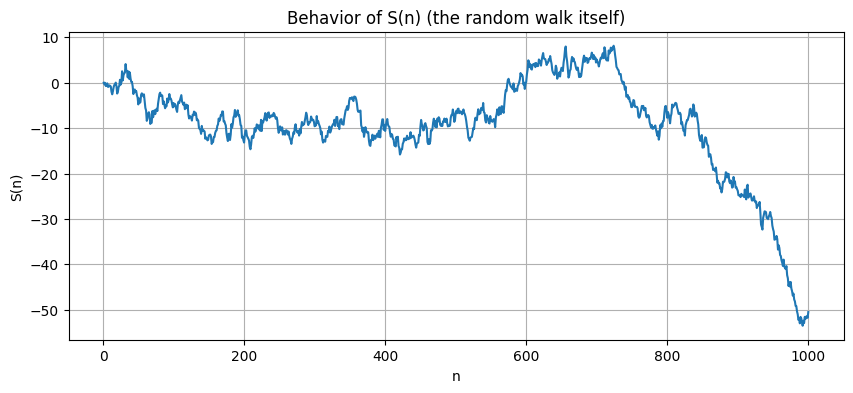

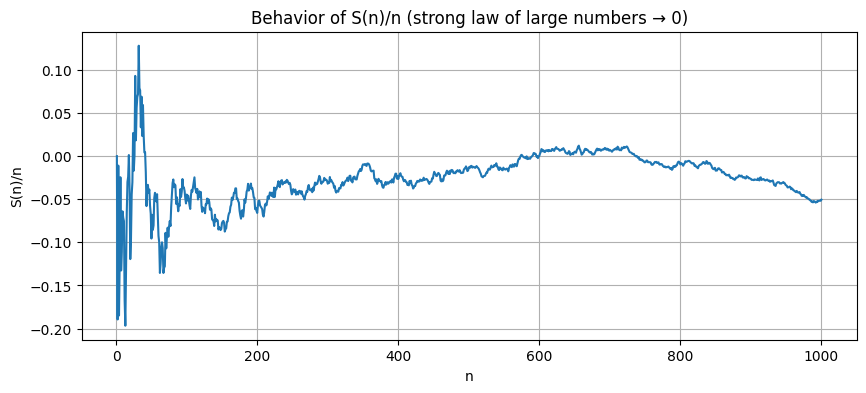

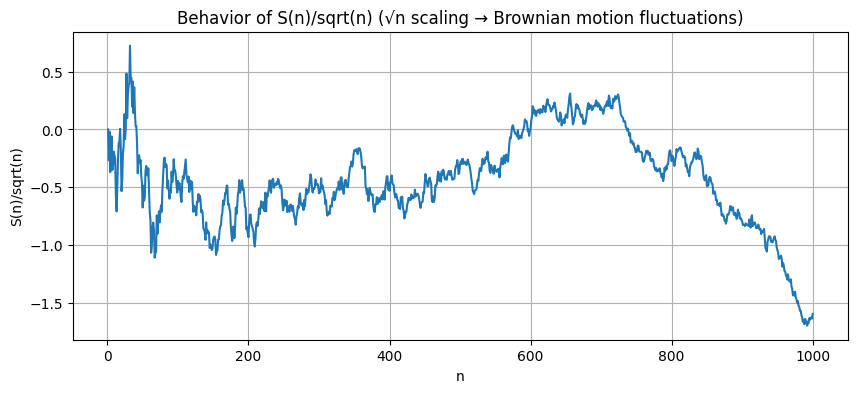

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Generate random walk
N = 1000
S = np.zeros(N)
for n in range(1, N):
    S[n] = S[n-1] + np.random.randn()

n = np.arange(1, N+1)

# Plot S(n)
plt.figure(figsize=(10,4))
plt.plot(n, S)
plt.title("Behavior of S(n) (the random walk itself)")
plt.xlabel("n")
plt.ylabel("S(n)")
plt.grid(True)
plt.show()

# Plot S(n)/n
plt.figure(figsize=(10,4))
plt.plot(n, S / n)
plt.title("Behavior of S(n)/n (strong law of large numbers → 0)")
plt.xlabel("n")
plt.ylabel("S(n)/n")
plt.grid(True)
plt.show()

# Plot S(n)/sqrt(n)
plt.figure(figsize=(10,4))
plt.plot(n, S / np.sqrt(n))
plt.title("Behavior of S(n)/sqrt(n) (√n scaling → Brownian motion fluctuations)")
plt.xlabel("n")
plt.ylabel("S(n)/sqrt(n)")
plt.grid(True)
plt.show()


Eseguendo il codice possiamo vedere che:

- La somma semplice $ S_n $ diverge. In effetti, questo risultato era prevedibile perché

$$
\text{Var}(S_n) = n\sigma^2,
$$
e
$$
\lim_{n \to \infty}[n\sigma^2]= \infty,
$$
quindi la variabilità di $ S_n $ cresce illimitatamente al tendere di $ n $ all'infinito.

Nota: per dopo, teniamo presente che la deviazione standard di $S_n$ è:

$$
\text{Std}(S_n)=\sqrt{\text{Var}(S_n)}=\sqrt{n\sigma^2}=\sigma\sqrt{n}
$$

- La media $ S_n / n $ converge. Infatti, in questo caso si ha

$$
\text{Var}(S_n / n) = \frac{\text{Var}(S_n)}{n^2} = \frac{n\sigma^2}{n^2} = \frac{\sigma^2}{n},
$$
e
$$
\lim_{n \to \infty}[\frac{\sigma^2}{n}]= 0,
$$

pertanto la variabilità di $ S_n / n $ si annulla quando $ n \to \infty $.

- Un fattore di normalizzazione interessante è $ 1 / \sqrt{n} $. Nel caso $ \mu = 0 $, possiamo osservare dai grafici che $ S_n / \sqrt{n} $ né diverge né converge! Non tende ad allontanarsi da 0, ma non converge neppure a 0. Piuttosto, si comporta come una certa variabile aleatoria:

$$
\text{Var}(S_n / \sqrt{n}) = \frac{\text{Var}(S_n)}{n} = \frac{n\sigma^2}{n} = \sigma^2 = \text{Var}(X_i),
$$


Il teorema seguente afferma che tale variabile ha approssimativamente distribuzione Normale per $ n $ grande.

> **Teorema 1 (Teorema del Limite Centrale)**  

Siano $ X_1, X_2, \ldots $ variabili aleatorie **indipendenti** con lo stesso valore atteso $ \mu = \mathbb{E}(X_i) $ e la stessa deviazione standard $ \sigma = \text{Std}(X_i) $, e sia

$$
S_n = \sum_{i=1}^n X_i = X_1 + \ldots + X_n.
$$
la variabile aleatoria somma, mentre 

$$
Z_n = \frac{S_n - \mathbb{E}(S_n)}{\text{Std}(S_n)} = \frac{S_n - n\mu}{\sigma \sqrt{n}}
$$
la variabie aleatoria somma _standardizzata_.

Quando $ n \to \infty $, la somma standardizzata $Z_n$ _converge in distribuzione_ a una variabile aleatoria Normale Standard, cioè:
$$
[Z_n]_{n \to \infty }\sim \mathcal{N}(0,1)
$$
Oppure, in altre parole, la sua CDF, $F_{Z_n}(z)$ converge alla CDF della normale standard $\Phi(z)$:

$$
F_{Z_n}(z) = P\left( \frac{S_n - n\mu}{\sigma \sqrt{n}} < z \right) \to \Phi(z)
\quad \text{per ogni } z.
\quad (4.18)
$$

Questo teorema è molto potente perché può essere applicato a variabili aleatorie $ X_1, X_2, \ldots $ con qualsiasi tipo di distribuzione (purché abbiano un valore atteso e varianza finite). Finché $ n $ è sufficientemente grande (la regola empirica è $ n > 30 $), si può utilizzare la distribuzione Normale per calcolare probabilità relative a $ S_n$.

Il Teorema 1 rappresenta solo una versione fondamentale del Teorema del Limite Centrale. Negli ultimi due secoli, esso è stato esteso a vaste classi di variabili dipendenti, vettori aleatori, processi stocastici, e così via.

> **Esempio 4.13 (Allocazione dello spazio su disco).** Un disco ha uno spazio libero di 330 megabyte. È probabile che questo spazio sia sufficiente per memorizzare 300 immagini indipendenti, sapendo che ciascuna immagine ha una dimensione attesa di 1 megabyte e uno scarto quadratico medio di 0,5 megabyte?

**Soluzione.** Abbiamo $ n = 300 $, $ \mu = 1 $, $ \sigma = 0.5 $. Il numero di immagini $ n $ è grande, quindi il Teorema del Limite Centrale si applica alla dimensione totale $ S_n $. Allora,

$$
P(\text{spazio sufficiente}) = P(S_n \leq 330) = P\left( \frac{S_n - n\mu}{\sigma \sqrt{n}} \leq \frac{330 - (300\times1)}{0.5 \sqrt{300}} \right)
$$

$$
\approx \Phi(3.46) = 0.9997.
$$

Questa probabilità è molto elevata; pertanto, lo spazio disponibile sul disco è quasi certamente sufficiente. ♦

> **NB** Nel caso speciale in cui le variabili $ X_1, X_2, \ldots $ siano distribuite secondo una Normale, la distribuzione di $ S_n $ è sempre Normale, e la (4.18) diventa un'uguaglianza esatta per ogni valore di $ n $, anche piccolo.

**Esempio 4.14 (Ascensore).** State aspettando un ascensore con capacità massima di 2000 libbre. L’ascensore arriva con dieci passeggeri adulti. Supponete che il vostro peso sia di 150 libbre e abbiate sentito che i pesi degli esseri umani seguono una distribuzione Normale con media 165 libbre e scarto quadratico medio di 20 libbre. Decidereste di salire sull’ascensore o di aspettare il prossimo?

**Soluzione.** In altre parole, è probabile un sovraccarico? La probabilità di un sovraccarico è

$$
P(S_{10} + 150 > 2000) = P(S_{10}  > 2000 -150) = P\left( \frac{S_{10} - (10 \times 165)}{20 \sqrt{10}} > \frac{2000 - 150 - (10 \times 165)}{20 \sqrt{10}} \right)
$$

$$
= 1 - \Phi(3.16) = 0.0008.
$$

Quindi, con probabilità $ 0.9992 $, è sicuro utilizzare questo ascensore. Ora tocca a voi decidere. ♦

Tra le variabili aleatorie discusse nei Capitoli 3 e 4, la **Variabile Binomiale** ha una forma speciale: essa è infatti una **somma** di variabili di Bernoulli **indipendenti** e **identicamente distribuite** Di conseguenza, il Teorema del Limite Centrale si applica a questa distribuzione quando $ n $ è sufficientemente grande. In effetti, Abraham de Moivre (1667–1754) ottenne la prima versione del Teorema del Limite Centrale proprio come approssimazione della distribuzione Binomiale. Vediamo più da vicino questo risultato:

### Approssimazione Normale della distribuzione Binomiale

Le variabili binomiali rappresentano un caso particolare di $ S_n = X_1 + \ldots + X_n $, in cui tutte le $ X_i $ hanno distribuzione di Bernoulli con un certo parametro $ p $. Sappiamo dalla Sezione 3.3.6 che per valori piccoli di $ p $ è possibile approssimare la distribuzione Binomiale con una distribuzione di Poisson, e per valori grandi di $ p $ un'approssimazione analoga si applica al numero di fallimenti.

Per valori moderati di $ p $ (ad esempio, $ 0.05 \leq p \leq 0.95 $) e per $ n $ grande, possiamo applicare il Teorema 1:

$$
\text{Binom}(n, p) \sim \mathcal{N}\left( \mu = np, \, \sigma = \sqrt{np(1 - p)} \right)
\quad (4.19)
$$

Esegui la seguente cella di codice per avere una visuale grafica di come, man mano che $ n $ aumenta, la PMF della distribuzione Binomiale è via via più similare alla PDF della distribuzione Normale:

<Figure size 640x480 with 0 Axes>

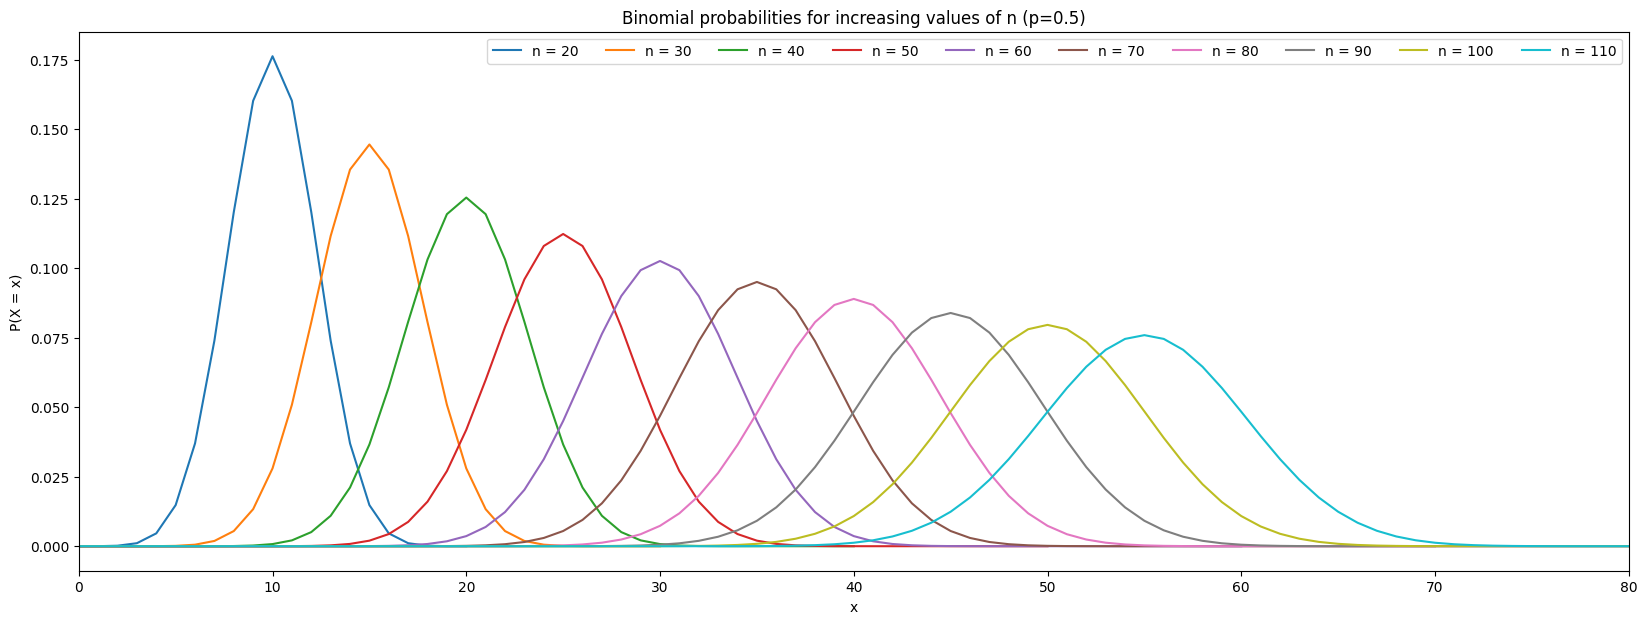

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from math import comb

plt.figure()
# Increase plot size
plt.figure(figsize=(20,7))
# Plot binomial PMFs for n = 1,3,5,...,99
for n in range(20,120, 10):
    x = np.arange(0, n+1)
    p = np.array([comb(n, k) * (0.5**k) * (0.5**(n-k)) for k in x])
    plt.plot(x, p, label=f'n = {n}')

plt.title("Binomial probabilities for increasing values of n (p=0.5)")
plt.xlabel("x")
plt.ylabel("P(X = x)")
plt.xlim(0, 80)
plt.legend(ncols=10)
plt.show()


### Correzione di continuità

Questa correzione è necessaria quando approssimiamo una distribuzione discreta (in questo caso la Binomiale) con una distribuzione continua (la Normale). Ricordiamo che la probabilità $ P(X = x) $ può essere positiva se $ X $ è una variabile discreta, mentre è sempre nulla se $ X $ è continua. Pertanto, un uso diretto della (4.19) approssimerebbe sempre $ P(X = x) $ con 0, il che rappresenterebbe un'approssimazione scadente.

Il problema si risolve introducendo la **correzione di continuità**: si estende l'intervallo di 0,5 unità in ogni direzione, quindi si utilizza l'approssimazione Normale. Si osserva che

$$
\boxed{
\begin{aligned}
    &\textbf{Correzioni di continuità}\\
    \text{Dati} \quad &  X \sim \text{Binom}(n,p) \quad \text{e} Y \sim \mathcal{N}(np, np(1-p)) \\ 
    \text{tale che} & \quad Y \approx X \quad \text{per valori di}\quad n \quad \text{abbastanza grandi}\\
    &\text{si ha:}\\ 
P_X(x) &= P(X = x) = P(x - 0.5 < Y < x + 0.5)\\
F_X(x) &= P(X \leq x) = P(Y < x + 0.5)\\
1-F_X(x) &= P(X > x) = P(Y > x + 0.5)\\
P_X(x) + [1- F_X(x)] &= P(X \geq x) = P(Y > x - 0.5)\\
F_X(x) - P_X(x) &= P(X < x) = P(Y < x - 0.5)\\
\end{aligned}
}
$$


La correzione per continuità non modifica l'evento né altera la sua probabilità. Tuttavia, fa la differenza nel caso della distribuzione Normale: trasforma la probabilità di un singolo punto (che sarebbe zero) nella probabilità di un intervallo (che non è nulla).

Ogni volta che approssimiamo una distribuzione discreta con una continua, dobbiamo utilizzare la correzione per continuità.


**Esempio 4.15.** Un nuovo virus informatico attacca una cartella composta da 200 file. Ogni file viene danneggiato con probabilità $ 0.2 $, indipendentemente dagli altri. Qual è la probabilità che meno di 50 file vengano danneggiati?

**Soluzione.** Il numero $ X $ di file danneggiati ha distribuzione Binomiale con $ n = 200 $, $ p = 0.2 $, $ \mu = np = 40 $, e $ \sigma = \sqrt{np(1 - p)} = 5.657 $. Applicando il Teorema del Limite Centrale con la correzione per continuità,

$$
P(X < 50) = P(X \leq 49) = P(X < 49.5) = P\left( \frac{X - 40}{5.657} < \frac{49.5 - 40}{5.657} \right)
$$

$$
= P\left( Z < 1.68 \right) = \Phi(1.68) = 0.9535.
$$

Si noti che la correzione per continuità corretta sostituisce 50 con 49,5 e non con 50,5. Infatti, siamo interessati all'evento in cui $ X $ è strettamente minore di 50, cioè $ X \leq 49 $. Tale evento corrisponde all'intervallo $ [0, 49] $, che, con la correzione, diventa $ [0, 49.5] $. In altre parole, gli eventi $ \{X < 50\} $ e $ \{X < 49.5\} $ sono equivalenti e includono gli stessi possibili valori di $ X $.

Gli eventi $ \{X < 50\} $ e $ \{X < 50.5\} $ sono invece diversi: il primo include $ X = 50 $? No — $ X < 50 $ esclude 50. $ X < 50.5 $ include $ X = 50 $. Quindi $ \{X < 50\} $ include tutti i valori fino a 49, mentre $ \{X < 50.5\} $ include fino a 50. Dunque, sostituire $ \{X < 50\} $ con $ \{X < 50.5\} $ avrebbe ampliato l'evento e avrebbe portato a una sovrastima della probabilità.

Pertanto, la scelta corretta è $ 49.5 $ per l'evento $ X < 50 $. ♦

Quando una distribuzione continua (ad esempio, Gamma) viene approssimata con un'altra distribuzione continua (ad esempio, Normale), la correzione per continuità **non è necessaria**. In effetti, sarebbe un errore utilizzarla, perché altererebbe l'evento e non preserverebbe la probabilità.

# ss

In [ ]:
import numpy as np  
import matplotlib.pyplot as plt  

# Parametri della simulazione  
num_walkers = 10000  # Numero di "camminatori" (particelle o simulazioni indipendenti)  
num_steps = 1000     # Numero di passi per ciascun camminatore  

# Simula i passi casuali: +1 o -1 con probabilità uguale  
steps = np.random.choice([-1, 1], size=(num_walkers, num_steps))  

# Calcola la posizione finale per ciascun camminatore (somma dei passi)  
positions = np.sum(steps, axis=1)  

# Plot dell'istogramma delle posizioni finali (normalizzato per ottenere una densità di probabilità)  
plt.figure(figsize=(10, 6))  
plt.hist(positions, bins=50, density=True, alpha=0.6, color='green', label='Istogramma delle posizioni')  

# Calcola media e deviazione standard (dovrebbero essere circa 0 e sqrt(num_steps))  
mu = np.mean(positions)  
sigma = np.std(positions)  

# Sovraimponi la curva gaussiana teorica  
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 100)  
gaussian = (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(- (x - mu)**2 / (2 * sigma**2))  
plt.plot(x, gaussian, 'r--', linewidth=2, label='Distribuzione Gaussiana')  

# Aggiungi titoli e etichette  
plt.title('Simulazione di Random Walk: Evoluzione verso Distribuzione Gaussiana')  
plt.xlabel('Posizione Finale')  
plt.ylabel('Densità di Probabilità')  
plt.legend()  
plt.grid(True)
# Se vuoi salvare il grafico: 
# plt.savefig('random_walk.png')
plt.show()  

# Stampa alcune statistiche per verifica  
print(f"Media delle posizioni: {mu:.2f} (attesa ~0)")  
print(f"Deviazione standard: {sigma:.2f} (attesa ~sqrt({num_steps}) = {np.sqrt(num_steps):.2f})")